In [104]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(100_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

In [105]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [106]:
bbb_itp_id = 290

In [107]:
analysis_date = dt.date(2022, 2, 8)

In [108]:
pbar = tqdm()

0it [00:00, ?it/s]

In [109]:
bbb = rt.OperatorDayAnalysis(bbb_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
11402517-137-Blocks-Weekday-51
11403326-137-Blocks-Weekday-14
11401834-137-Blocks-Weekday-51
11402478-137-Blocks-Weekday-51
11427096-137-Blocks-Weekday-14
11403562-137-Blocks-Weekday-14
11403225-137-Blocks-Weekday-14
11403590-137-Blocks-Weekday-51
11427350-137-Blocks-Weekday-51
11427080-137-Blocks-Weekday-14
11427081-137-Blocks-Weekday-51
11402028-137-Blocks-Weekday-51
11402688-137-Blocks-Weekday-14
11401868-137-Blocks-Weekday-14
11401851-137-Blocks-Weekday-51
11402770-137-Blocks-Weekday-51
11403182-137-Blocks-Weekday-14
11402784-137-Blocks-Weekday-14
11402692-137-Blocks-Weekday-14
11401987-137-Blocks-Weekday-51
11402729-137-Blocks-Weekday-51
11403096-137-Blocks-Weekday-14
11402002-137-Blocks-Weekday-14
11402503-137-Blocks-Weekday-14
11402014-137-Blocks-Weekday-14
11427339-137-Blocks-Weekday-14
11403298-137-Blocks-Weekday-51
11401925-137-Blocks-Weekday-14
11454057-137-Blocks-Weekday-51
11403658-137-Blocks-Weekday-14


ValueError: Expected a 1D array, got an array with shape (0, 10)

In [111]:
bbb.rt_trips >> head(3)

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph,calitp_agency_name
0,300,0,2022-02-08,-3880794432110418766,863274,3369,1,25468,2021-12-06,2022-03-08,R3,07:04:08,Eastbound,13.530882,Big Blue Bus
1,300,0,2022-02-08,-6981635930623604545,863227,3369,0,25467,2021-12-06,2022-03-08,R3,17:03:52,Westbound,13.569099,Big Blue Bus
2,300,0,2022-02-08,8604654890119505412,863271,3369,1,25468,2021-12-06,2022-03-08,R3,12:44:21,Eastbound,7.344299,Big Blue Bus


In [61]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': None, 'shape_ids': None, 'direction_id': None, 'direction': None}


In [75]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', route_names=['1', '3', 'R12'])

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1', '3', 'R12'], 'shape_ids': None, 'direction_id': None, 'direction': None}


In [76]:
m = rt.OperatorDayAnalysis.segment_speed_map(bbb)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1', '3', 'R12'], 'shape_ids': None, 'direction_id': None, 'direction': None}
25404_1_ empty!
25444_1_ empty!
25418_1_ empty!
25419_0_ empty!
25446_0_ empty!
25411_0_ empty!


/home/jovyan/data-analyses/rt_delay/rt_analysis.py:603: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [77]:
m

In [78]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', shape_ids=['25404'])

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': None, 'direction': 'Northbound'}


In [79]:
# bbb.set_filter(start_time='15:00', end_time='19:00', shape_ids=['25404'], direction_id='0')

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': None, 'direction': 'Northbound'}


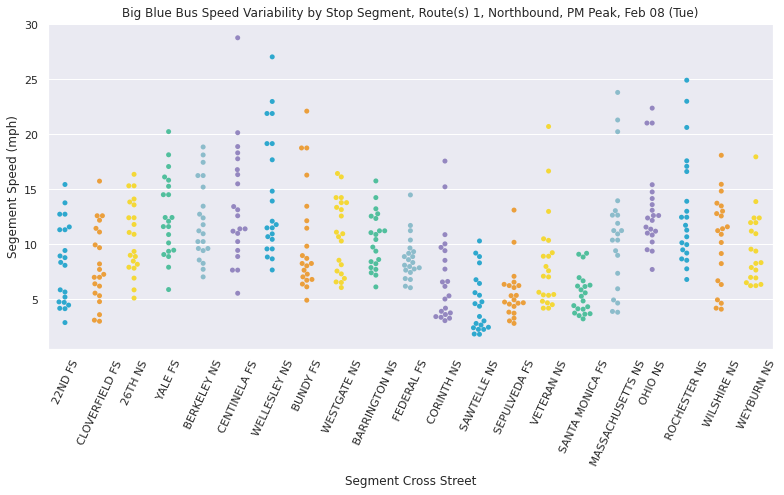

In [88]:
chart = rt.OperatorDayAnalysis.chart_variability(bbb, min_stop_seq = 20, max_stop_seq = 40)

In [14]:
bbb.position_interpolators['860694']['rt'].direction

'Northbound'

In [15]:
bbb._filter(bbb.rt_trips)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': '0', 'direction': 'Northbound'}


,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph
0,300,0,2022-02-08,9189496404936817804,860694,3353,0,25404,2021-12-06,2022-03-08,1,15:46:19.500000,Northbound,6.010434
1,300,0,2022-02-08,-3054465324703039246,860702,3353,0,25404,2021-12-06,2022-03-08,1,17:11:19,Northbound,6.487212
2,300,0,2022-02-08,5817864788633008922,860713,3353,0,25404,2021-12-06,2022-03-08,1,17:46:35,Northbound,7.103820
3,300,0,2022-02-08,972988220055993101,860714,3353,0,25404,2021-12-06,2022-03-08,1,18:01:13,Northbound,6.273718
4,300,0,2022-02-08,-1360799802736523785,860693,3353,0,25404,2021-12-06,2022-03-08,1,15:43:13,Northbound,5.887252
5,300,0,2022-02-08,6273108700257837027,860718,3353,0,25404,2021-12-06,2022-03-08,1,18:59:09,Northbound,8.431785
6,300,0,2022-02-08,5649523177058113349,860715,3353,0,25404,2021-12-06,2022-03-08,1,18:17:57,Northbound,6.492155
7,300,0,2022-02-08,5096104807605464446,860704,3353,0,25404,2021-12-06,2022-03-08,1,17:39:19,Northbound,9.701092
8,300,0,2022-02-08,410095616705037738,860717,3353,0,25404,2021-12-06,2022-03-08,1,18:43:12,Northbound,7.221804
9,300,0,2022-02-08,3507325484027120510,860695,3353,0,25404,2021-12-06,2022-03-08,1,16:01:18,Northbound,6.567387


### Cleaning and Formatting!
   * some sort of stop formatting? beyond optionally splitting on &?

### Files for self-serve

In [28]:
bbb.rt_trips['calitp_agency_name'] = bbb.calitp_agency_name

In [29]:
bbb.rt_trips.to_parquet('./temp/rt_trips.parquet')

In [30]:
bbb.stop_segment_speed_view.to_parquet('./temp/segment_speed_view.parquet')

/tmp/ipykernel_961/587181490.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')


### Example self-serve

In [46]:
trips = pd.read_parquet('./temp/rt_trips.parquet')

In [47]:
segments = gpd.read_parquet('./temp/segment_speed_view.parquet')

In [48]:
import rt_filter_map_plot

In [49]:
importlib.reload(rt_filter_map_plot)

<module 'rt_filter_map_plot' from '/home/jovyan/data-analyses/rt_delay/rt_filter_map_plot.py'>

In [50]:
bbb2 = rt_filter_map_plot.RtFilterMapper(trips, segments)

In [51]:
bbb2.set_filter(start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': None, 'shape_ids': None, 'direction_id': None, 'direction': None}


In [52]:
# bbb2.set_filter(start_time='15:00', end_time='19:00', route_names=['1', '3', 'R12'])

In [ ]:
bbb2.show_speed_map()

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': None, 'shape_ids': None, 'direction_id': None, 'direction': None}


/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
/home/jovyan/data-analyses/rt_delay/rt_filter_map_plot.py:155: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [24]:
bbb2.stop_segment_speed_view = bbb2.stop_segment_speed_view >> filter(_.speed_mph < 70)

In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [34]:
bbb2.set_filter(start_time='15:00', end_time='19:00', shape_ids=['25411'])

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25411'], 'direction_id': None, 'direction': 'Southbound'}


In [35]:
interact(bbb2.chart_variability, min_stop_seq = 25, max_stop_seq = 25)

interactive(children=(IntSlider(value=25, description='min_stop_seq', max=75, min=-25), IntSlider(value=25, de…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [28]:
bbb2_routes = list(bbb2.rt_trips.route_short_name.unique())
all_routes = widgets.SelectMultiple(
    options=bbb2_routes,
    value=bbb2_routes[:1],
    #rows=10,
    description='Routes',
    disabled=False
)

In [32]:
interact(bbb2.set_filter, start_time = fixed('15:00'), end_time = fixed('19:00'),
        route_names = all_routes, shape_ids = fixed(False),
        direction_id = fixed(False), direction = fixed(False))

interactive(children=(SelectMultiple(description='Routes', index=(0,), options=('R3', '43', '3', '8', 'R12', '…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [37]:
bbb2.show_speed_map()

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ('41',), 'shape_ids': False, 'direction_id': False, 'direction': False}


/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
/home/jovyan/data-analyses/rt_delay/rt_filter_map_plot.py:155: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [44]:
def filter_then_map(filter_mapper, start_time, end_time, route_names, shape_ids, direction_id, direction):
    filter_mapper.set_filter(start_time = start_time, end_time = end_time,
        route_names = all_routes, shape_ids = shape_ids,
        direction_id = direction_id, direction = direction)
    return filter_mapper.show_speed_map()

In [45]:
interact(filter_then_map, filter_mapper = fixed(bbb2), start_time = fixed('15:00'), end_time = fixed('19:00'),
        route_names = all_routes, shape_ids = fixed(False),
        direction_id = fixed(False), direction = fixed(False))

interactive(children=(SelectMultiple(description='Routes', index=(8,), options=('R3', '43', '3', '8', 'R12', '…

<function __main__.filter_then_map(filter_mapper, start_time, end_time, route_names, shape_ids, direction_id, direction)>